# Notebook - Analisi della qualità del vino 

Il dataset sulla qualità del vino contiene informazioni su varie proprietà fisico-chimiche dei vini. É associato un set di dati alla sua varietà di colore: vino rosso e vino bianco. Ad ogni vino è assegnata un'etichetta riguardante la qualità.

![](http://pasticceriedelite.it/wp-content/uploads/2021/02/rossibianchi.jpg)

### Indice:
1. <a href="http://localhost:8888/notebooks/Wine%20Analysis.ipynb#1---Manipolazioni-dei-Dati">Manipolazione dei Dati</a> 
2. <a href="http://localhost:8888/notebooks/Wine%20Analysis.ipynb#Statistica-Descrittiva-e-Analisi-Esplorativa-tramite-Tecniche-di-Visualizzazione">Analisi Statistica Descrittiva e Visualizzazione</a>  
3. <a href="http://localhost:8888/notebooks/Wine%20Analysis.ipynb#Machine-learnging">Machine Learning</a>

### Import delle librerie necessarie

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay

plt.style.use('seaborn')

### Caricamento dei dataset <a href="https://archive.ics.uci.edu/ml/datasets/Wine+Quality" target="_blank">LINK</a>

In [2]:
# utilizzo il separatore ';'
df_white_wine = pd.read_csv('./winequality-white.csv', sep=';')
df_red_wine = pd.read_csv('./winequality-red.csv', sep=';')

## 1 - Manipolazioni dei dati

In [3]:
df_red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df_white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [5]:
df_red_wine['wine color'] = 'red'   
df_white_wine['wine color'] = 'white'

### Modifica dei dataset aggiungendo la colonna relativa al colore del vino

In [6]:
df_red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [7]:
df_white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


### Verifica preliminare di righe e colonna per unire i due dataset

In [8]:
print(df_red_wine.count())
print()
print(df_white_wine.count())

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
wine color              1599
dtype: int64

fixed acidity           4898
volatile acidity        4898
citric acid             4898
residual sugar          4898
chlorides               4898
free sulfur dioxide     4898
total sulfur dioxide    4898
density                 4898
pH                      4898
sulphates               4898
alcohol                 4898
quality                 4898
wine color              4898
dtype: int64


***

*I vini rossi sono 1599 mentre i vini bianchi sono 4898. Da una prima analisi notiamo che non ci sono anomalie su valori nulli. Inoltre, hanno le stesse colonne quindi sono concatenabili*

### Concatenamento dei due dataset in un unico dataset (orizzontalmente)

In [9]:
df_wines = pd.concat([df_red_wine, df_white_wine], axis=0)

# mescolamento delle righe (axis = 0), ritorna tutte le righe (frac = 1)
df_wines = df_wines.sample(frac=1, axis=0)

# reset degli indici, elimina la colonna degli indici precedente (drop=true)
# lavora sullo stesso DF (inplace=true)
df_wines.reset_index(inplace=True, drop=True)

# verifichiamo le operazioni
df_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine color            6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


***

*Si ottengono 6497 entries con indici che vanno da 0 a 6496*

In [10]:
df_wines.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine color
6492,4.9,0.235,0.27,11.75,0.030,34.0,118.0,0.99540,3.07,0.50,9.4,6,white
6493,7.6,0.390,0.31,2.30,0.082,23.0,71.0,0.99820,3.52,0.65,9.7,5,red
6494,7.1,0.670,0.00,2.30,0.083,18.0,27.0,0.99768,3.44,0.54,9.4,5,red
6495,6.7,0.640,0.30,1.20,0.030,18.0,76.0,0.98920,3.16,0.60,12.9,4,white
6496,8.5,0.490,0.11,2.30,0.084,9.0,67.0,0.99680,3.17,0.53,9.4,5,red


***

*Notiamo come gli indici vengono resettato in modo predefinito dopo la concatenazione ed il mescolamento*

### Verifica dei valori null sul nuovo dataset

In [11]:
df_wines.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
wine color              False
dtype: bool

***

*Non ci sono valori mancanti/nulli e tutte le colonne (al netto della colonna descrittive aggiunta: colore) hanno un valore numerico*

## Machine Learning

### Preparazione dei dataset

In [12]:
#Divido le features dalla label
#Deinifisco features e label per il dataset di vini bianchi e rossi
df_wines = df_wines.drop(columns=['quality'])
y = df_wines.pop('wine color')
X = df_wines

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
dtypes: float64(11)
memory usage: 558.5 KB


In [14]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,6.3,0.22,0.27,4.50,0.036,81.0,157.0,0.99280,3.05,0.76,10.7
1,6.4,0.35,0.20,5.70,0.034,18.0,117.0,0.99440,3.33,0.43,10.1
2,7.8,0.29,0.29,3.15,0.044,41.0,117.0,0.99153,3.24,0.35,11.5
3,7.6,0.38,0.20,3.40,0.046,9.0,116.0,0.99440,3.15,0.41,9.4
4,7.9,0.20,0.35,1.70,0.054,7.0,15.0,0.99458,3.32,0.80,11.9


#### Normalizzazione dei dati

In [15]:
#Normalizzatoredei dati
scaler = MinMaxScaler(feature_range = (0,1))

In [16]:
#Effettuo la normalizzazione
X = scaler.fit_transform(X)

### Classificazione K-Neighbors

#### Inizializzazione del classificatore

In [17]:
#Preparo il classificatore
classificator = neighbors.KNeighborsClassifier(n_neighbors = 1)

#### Validazione HoldOut

In [18]:
#Preparo i dataset per validazione con holdout
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [19]:
#Addestro il modello
classificator.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [20]:
#Effettuo la predizione sui dati di test
y_predict = classificator.predict(X_test)

In [21]:
#Visualizzo la predizione
y_predict

array(['red', 'white', 'red', ..., 'white', 'white', 'white'],
      dtype=object)

In [22]:
#Calcolo l'accouracy
accuracy_score(y_test,y_predict)

0.9943589743589744

#### Validazione 5 Fold Cross

In [23]:
y_predict_leave_5_fold = cross_val_score(classificator,X,y,cv=5)

In [24]:
y_predict_leave_5_fold.mean()

0.9930733700479658

#### Validazione Leave One out

In [25]:
#Provo con tecnica Leave One Out
y_predict_leave_one_out = cross_val_score(classificator,X,y,cv=LeaveOneOut())

In [26]:
y_predict_leave_one_out.mean()

0.9923041403724796

#### Grid Search CV per cercare di migliorare il modello

In [27]:
#Cerco di calibrare il modello variando gli iper parametri con tecnica Grid Search CV
param_grid = {'n_neighbors' : np.arange(1,10), 'weights' : ['uniform','distance']}

In [28]:
#Prepare il Grid e lo eseguo su
grid = GridSearchCV(classificator,param_grid,cv=5)

In [29]:
#Addestro il modello sulle varue combinazioni degli iperparametri (VA FATTO SU X e y oppure su X_test e y_test) ???
grid.fit(X_train,y_train);

In [30]:
# Cerco il risultato migliore: aggiungere un peso pari all'inverso della distanza fra i nodi 
# insieme ad un numero di neighbors differente da 1
# permette di ottenere un miglioramento sul modello
grid.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [31]:
#Effettuo una verifica
y_predicted_by_grid = grid.best_estimator_.predict(X_test)

In [32]:
#Verifico l'accuratezza
accuracy_score(y_test,y_predicted_by_grid)

0.9958974358974358

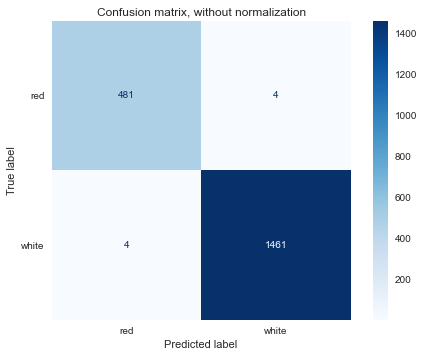

In [44]:
np.set_printoptions()

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
   ##("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        grid.best_estimator_,
        X_test,
        y_test,
        display_labels= ['red','white'],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)
    plt.grid(False)
plt.show()

### Classificazione con SVC

#### Inizializzazione del classificatore

In [33]:
svc_classifier = SVC(kernel= 'linear')

#### Holdout Validazione

In [34]:
svc_classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [35]:
y_predict_svc = svc_classifier.predict(X_test)

In [36]:
accuracy_score(y_test,y_predict_svc)

0.9933333333333333

#### 5 fold cross validation

In [37]:
y_predict_svc_5_fold = cross_val_score(svc_classifier,X,y,cv=5)

In [38]:
y_predict_svc_5_fold.mean()

0.9904572748267897

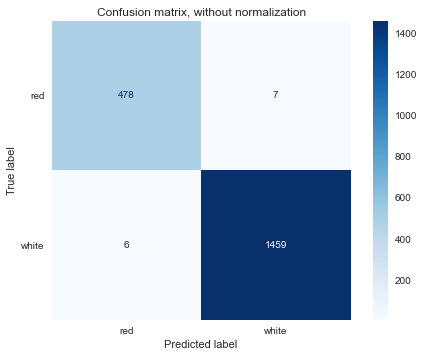

In [45]:
np.set_printoptions()

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
   ##("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        svc_classifier,
        X_test,
        y_test,
        display_labels= ['red','white'],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)
    plt.grid(False)
plt.show()